In [1]:
#install and import libraries

import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#load dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [14]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])
df_da_us_exploded = df_da_us.explode('job_skills')

In [15]:
df_da_skills = df_da_us_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_da_skills = df_da_skills.rename(columns={'count':'skill_count', 'median':'median_salary'})
da_job_count = len(df_da_us)
df_da_skills['skill_percent'] = df_da_skills['skill_count']/da_job_count *100

In [18]:
skill_percent = 5
df_da_skills_high_demand = df_da_skills[df_da_skills['skill_percent'] > skill_percent]
df_da_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


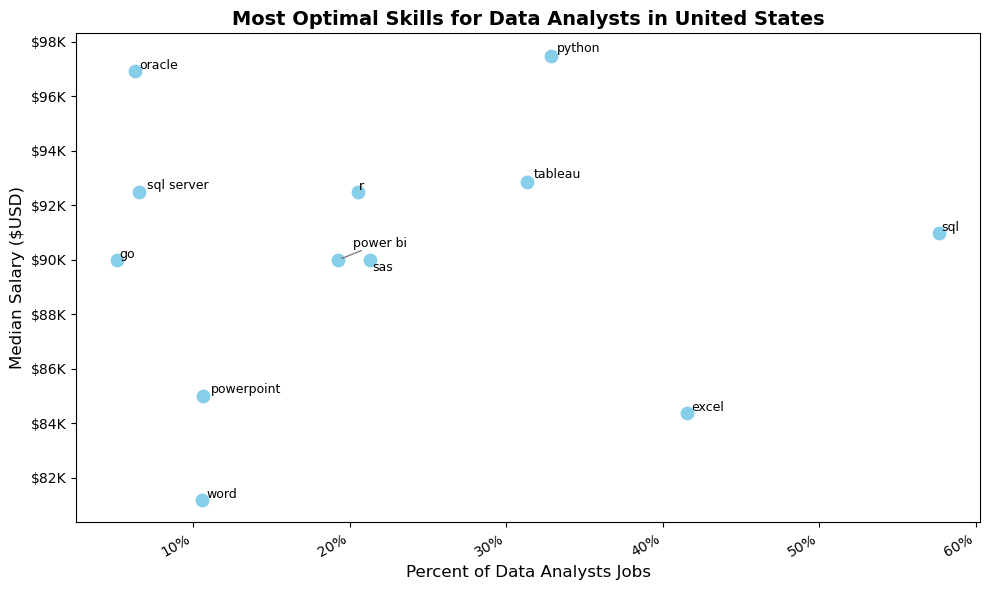

In [23]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter



# Scatter plot of skill count vs median salary
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df_da_skills_high_demand['skill_percent'], df_da_skills_high_demand['median_salary'], color='skyblue', s=80)

# Add skill labels
texts = []
for i, skill in enumerate(df_da_skills_high_demand.index):
    texts.append(
        ax.text(
            df_da_skills_high_demand['skill_percent'].iloc[i], 
            df_da_skills_high_demand['median_salary'].iloc[i], 
            skill, 
            fontsize=9
        )
    )

# Adjust text to avoid overlaps with arrows
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

# Format y-axis as $K
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
# Labels and title
ax.set_title('Most Optimal Skills for Data Analysts in United States', fontsize=14, weight='bold')
ax.set_xlabel('Percent of Data Analysts Jobs', fontsize=12)
ax.set_ylabel('Median Salary ($USD)', fontsize=12)



# Rotate x-axis labels if needed
plt.xticks(rotation=30, ha='right')

# Tight layout for neatness
plt.tight_layout()
plt.show()


In [ ]:
df_technology = df['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))


In [25]:
df_tech = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_tech = df_tech.explode('skills')

In [28]:
df_plot = df_da_skills_high_demand.merge(df_tech, left_on='job_skills', right_on='skills')

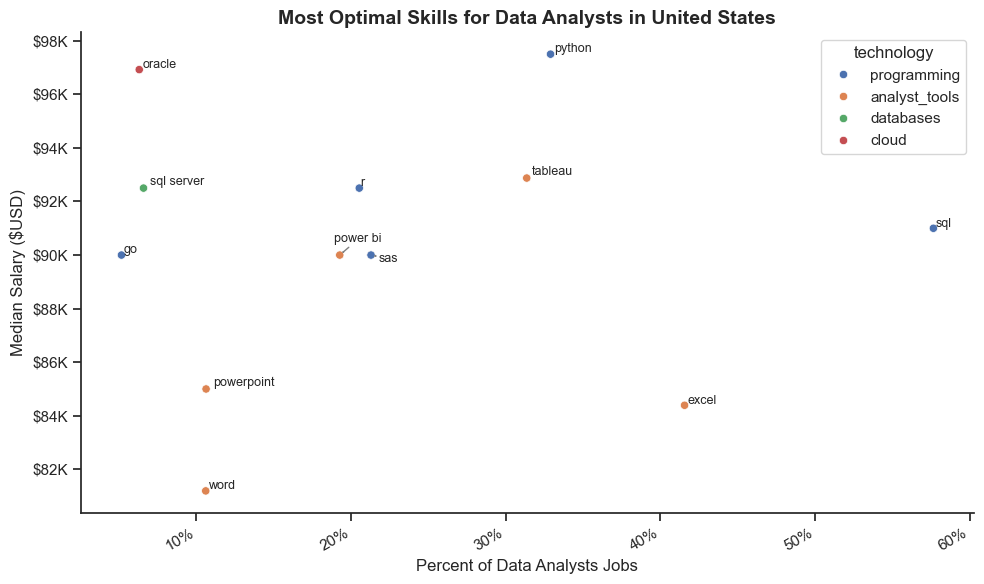

In [41]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter



# Scatter plot of skill count vs median salary
fig, ax = plt.subplots(figsize=(10, 6))
#ax.scatter(df_da_skills_high_demand['skill_percent'], df_da_skills_high_demand['median_salary'], color='skyblue', s=80)
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)
# Add skill labels
texts = []
for i, skill in enumerate(df_da_skills_high_demand.index):
    texts.append(
        ax.text(
            df_da_skills_high_demand['skill_percent'].iloc[i], 
            df_da_skills_high_demand['median_salary'].iloc[i], 
            skill, 
            fontsize=9
        )
    )

# Adjust text to avoid overlaps with arrows
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

# Format y-axis as $K
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
# Labels and title
ax.set_title('Most Optimal Skills for Data Analysts in United States', fontsize=14, weight='bold')
ax.set_xlabel('Percent of Data Analysts Jobs', fontsize=12)
ax.set_ylabel('Median Salary ($USD)', fontsize=12)
sns.despine()
sns.set_theme(style='ticks')


# Rotate x-axis labels if needed
plt.xticks(rotation=30, ha='right')

# Tight layout for neatness
plt.tight_layout()
plt.show()
